# Phishing link detection Flask Application using URL feature analysis and ML
## Logistic Regression and MultinomialNB Classifier


### Importing dependencies for the project


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 

from sklearn.pipeline import Pipeline
import pickle
print("Imported successfully")

Imported successfully


In [2]:
phish_data_df = pd.read_csv('.\phishing_site_urls.csv')
phish_data_df.head()
# phish_data_df.iloc[0]["URL"]

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


#### Balance of the Data

In [3]:
label_counts = pd.DataFrame(phish_data_df.Label.value_counts())
label_counts



,count
Label,
good,392924
bad,156422


#### Visualizing dataset

In [33]:
phish_data = pd.read_csv('.\phishing_site_urls.csv')
label_counts = pd.DataFrame(phish_data.Label.value_counts())
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
#visualizing target_col
label_counts = pd.DataFrame(phish_data['Label'].value_counts()).reset_index()
label_counts.columns = ['Label', 'Count']

# Visualize the target_col
fig = px.bar(label_counts, x='Label', y='Count')
fig.show(renderer="colab")
print("visualized")

visualized


In [5]:
phish_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
phish_data_df.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
X = phish_data_df['URL']
Y = phish_data_df['Label']
print(X)
print(Y)

0         nobell.it/70ffb52d079109dca5664cce6f317373782/...
1         www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2         serviciosbys.com/paypal.cgi.bin.get-into.herf....
3         mail.printakid.com/www.online.americanexpress....
4         thewhiskeydregs.com/wp-content/themes/widescre...
                                ...                        
549341                                      23.227.196.215/
549342                                   apple-checker.org/
549343                                    apple-iclods.org/
549344                                   apple-uptoday.org/
549345                                    apple-search.info
Name: URL, Length: 549346, dtype: object
0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print("Train and Test data successfully splitted")

Train and Test data successfully splitted


#### Converting the text data to feature vectors using TfidFVectorizer

In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Vectors created")

Vectors created


### Logistic Regression Model 

In [10]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)

In [11]:
lr.fit(X_train_vec,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [12]:
test_acc = lr.predict(X_test_vec)

In [13]:
score_acc = accuracy_score(Y_test,test_acc)
print("The accuracy score of the trained logistic regression model is {:2f}".format(score_acc))

The accuracy score of the trained logistic regression model is 0.956858


In [14]:
lr.score(X_test_vec,Y_test)

0.9568581050332211

In [15]:
Scores_ML = {}
Scores_ML['LogisticRegression'] = lr.score(X_test_vec,Y_test)

### Multinomial NB Model

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_vec,Y_train)

MultinomialNB()

In [17]:
mnb.score(X_test_vec,Y_test)

0.9731409848002185

In [18]:
Scores_ML['MultinomialNB'] = mnb.score(X_test_vec,Y_test)
print(Scores_ML)

{'LogisticRegression': 0.9568581050332211, 'MultinomialNB': 0.9731409848002185}


### Decision Tree Classifier

In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=22)
print("Decision Tree classifier")

Decision Tree classifier


In [38]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', tree.DecisionTreeClassifier(random_state=22))
])

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', DecisionTreeClassifier(random_state=22))])

In [41]:
pipelineForDTC = pipeline
pipeline.score(X_test, Y_test)

0.9379539455720397

In [40]:
Scores_ML['DecisionTreeClassifier'] = pipeline.score(X_test,Y_test)
print(Scores_ML)

{'LogisticRegression': 0.9568581050332211, 'MultinomialNB': 0.9731409848002185, 'DecisionTreeClassifier': 0.9379539455720397}


### Confusion Matrix and Accuracy score of <u>Logistic Regression</u> Model

Training Accuracy : 0.9687810028306437
Testing Accuracy : 0.9568581050332211

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.87      0.97      0.92     28227
        Good       0.99      0.95      0.97     81643

    accuracy                           0.96    109870
   macro avg       0.93      0.96      0.95    109870
weighted avg       0.96      0.96      0.96    109870


CONFUSION MATRIX


<Axes: >

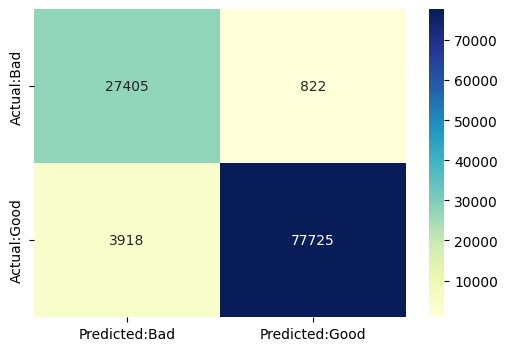

In [20]:

print('Training Accuracy :',lr.score(X_train_vec,Y_train))
print('Testing Accuracy :',lr.score(X_test_vec,Y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test_vec), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test_vec), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### Creating pipeline for the <u>Logistic regression</u> model

In [21]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Adjust max_features as needed
    ('nb', LogisticRegression(solver='liblinear', max_iter=1000))
])
print("pipeline created")

pipeline created


In [22]:
pipeline.fit(X_train,Y_train)
print(pipeline.score(X_test,Y_test))

0.9568581050332211


In [23]:
with open('pipeline_with_LR_Tfid.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [24]:
# loading the pickel
with open('pipeline_with_LR_Tfid.pkl', 'rb') as model_file:
    loaded_pipeline = pickle.load(model_file)
    new_data_text_bad = ['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526']
    new_data_text_good = ['https://www.youtube.com/results?search_query=phishing+link+detection']
    predictions_1 = loaded_pipeline.predict(new_data_text_bad)
    predictions_2 = loaded_pipeline.predict(new_data_text_good)
    print(f"{predictions_1} \n{predictions_2}")
    

['bad'] 
['good']


### Confusion Matrix and Accuracy Score of <u>MultinomialNB</u> Model

Training Accuracy : 0.9878969500040958
Testing Accuracy : 0.9731409848002185

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.98      0.95     29300
        Good       0.99      0.97      0.98     80570

    accuracy                           0.97    109870
   macro avg       0.96      0.98      0.97    109870
weighted avg       0.97      0.97      0.97    109870


CONFUSION MATRIX


<Axes: >

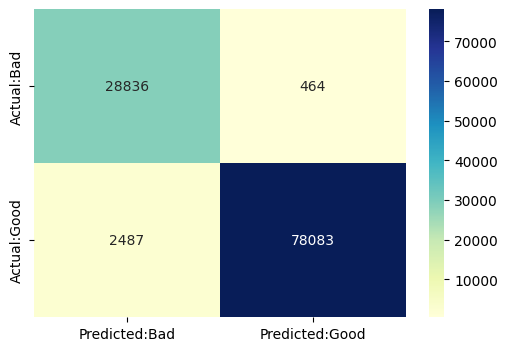

In [25]:
print('Training Accuracy :',mnb.score(X_train_vec,Y_train))
print('Testing Accuracy :',mnb.score(X_test_vec,Y_test))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(X_test_vec), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(X_test_vec), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### Creating pipeline for the <u>MultinomialNB</u> model

In [26]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Adjust max_features as needed
    ('nb', MultinomialNB())
])
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [27]:
pipeline.score(X_test,Y_test)

0.9731409848002185

In [28]:
with open('pipeline_with_MNB_Tfid.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [29]:
#Loading the pickel file
with open('pipeline_with_MNB_Tfid.pkl', 'rb') as model_file:
    loaded_pipeline2 = pickle.load(model_file)
    new_data_text_bad = ['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526']
    new_data_text_good = ['https://www.youtube.com/results?search_query=phishing+link+detection']
    predictions_1 = loaded_pipeline2.predict(new_data_text_bad)
    predictions_2 = loaded_pipeline2.predict(new_data_text_good)
    print(f"{predictions_1} \n{predictions_2}")


['bad'] 
['good']


In [30]:
### Storing the accuracy scores in a json 
print(Scores_ML)
import json
with open("accuracy_scores.json","w") as json_file:
    json.dump(Scores_ML,json_file)

{'LogisticRegression': 0.9568581050332211, 'MultinomialNB': 0.9731409848002185}


### Confusion Matrix and Accuracy Score of <u> DecisionTreeClassifier </u>

In [ ]:
# pipelineForDTC
print('Training Accuracy :',pipelineForDTC.score(X_train,Y_train))
print('Testing Accuracy :',pipelineForDTC.score(X_test_vec,Y_test))
con_mat = pd.DataFrame(confusion_matrix(pipelineForDTC.predict(X_test), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test_vec), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


### Thus Machine Learning model has been created for predicting the Malicious URL !!!